<a id="Importing Dataset and Librarys"></a> <br>
# **1. Importing Dataset and Librarys:** 
- Importing Librarys
- Importing Dataset

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import plotly.offline as py 
py.init_notebook_mode(connected=True) 
import plotly.graph_objs as go 
import plotly.tools as tls 
import warnings
from collections import Counter
import plotly.express as px

import re
import time
import math

pd.set_option('display.max_colwidth', None)

plt.style.use('ggplot')
#seaborn-v0 8-pastel

In [11]:
df = pd.read_csv('ds_challenge_data_2022.csv',encoding = 'utf16')
df

,transaction_id,user_id,género,linea_tc,interes_tc,monto,fecha,hora,dispositivo,establecimiento,ciudad,status_txn,is_prime,dcto,cashback,fraude
0,1,573,M,87000,56,581.03,02/01/20,0,"{'año': 2019, 'marca': 'Apple', 'proveedor': 'Telcel'}",Farmacia,Ciudad de México,Aceptada,False,0.00,17.43,False
1,2,737,F,34000,51,421.73,02/01/20,0,"{'año': 2021, 'marca': 'Huawei', 'proveedor': 'ATT'}",Tienda departamental,Cancún,Aceptada,False,0.00,12.65,False
2,3,887,F,52000,38,399.55,02/01/20,0,"{'año': 2017, 'marca': 'Apple', 'proveedor': 'ATT'}",Farmacia,Tijuana,En proceso,False,0.00,11.99,False
3,4,1304,M,67000,60,828.01,02/01/20,0,"{'año': 2019, 'marca': 'Samsung', 'proveedor': 'ATT'}",Tienda departamental,Ciudad de México,En proceso,False,0.00,24.84,False
4,5,1361,F,28000,52,886.04,02/01/20,0,"{'año': 2021, 'marca': 'Samsung', 'proveedor': 'Telcel'}",Supermercado,Cancún,Aceptada,False,0.00,26.58,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26970,26971,3368,F,30000,38,701.61,30/01/20,23,"{'año': 2019, 'marca': 'Samsung', 'proveedor': 'Telcel'}",Tienda departamental,Ciudad de México,Aceptada,False,0.00,21.05,False
26971,26972,3460,M,47000,35,368.91,30/01/20,23,"{'año': 2021, 'marca': 'Samsung', 'proveedor': 'ATT'}",Supermercado,Tijuana,Aceptada,False,18.45,11.07,False
26972,26973,3504,M,77000,37,108.18,30/01/20,23,"{'año': 2020, 'marca': 'Samsung', 'proveedor': 'Telcel'}",Abarrotes,Guadalajara,Aceptada,False,0.00,3.25,False
26973,26974,3581,N,89000,54,1308.53,30/01/20,23,"{'año': 2018, 'marca': 'Apple', 'proveedor': 'Telcel'}",Abarrotes,Guadalajara,Aceptada,False,0.00,39.26,False



# **2. First Look at the data:** 
- Looking the Type of Data
- Null Numbers
- Unique values
- The first rows of our dataset

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26975 entries, 0 to 26974
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   transaction_id   26975 non-null  int64  
 1   user_id          26975 non-null  int64  
 2   género           26975 non-null  object 
 3   linea_tc         26975 non-null  int64  
 4   interes_tc       26975 non-null  int64  
 5   monto            26975 non-null  float64
 6   fecha            26975 non-null  object 
 7   hora             26975 non-null  int64  
 8   dispositivo      26975 non-null  object 
 9   establecimiento  24036 non-null  object 
 10  ciudad           26641 non-null  object 
 11  status_txn       26975 non-null  object 
 12  is_prime         26975 non-null  bool   
 13  dcto             26975 non-null  float64
 14  cashback         26975 non-null  float64
 15  fraude           26975 non-null  bool   
dtypes: bool(2), float64(3), int64(5), object(6)
memory usage: 

In [13]:
#Looking for percentage of null values
print(df.isnull().mean()*100)

transaction_id      0.000000
user_id             0.000000
género              0.000000
linea_tc            0.000000
interes_tc          0.000000
monto               0.000000
fecha               0.000000
hora                0.000000
dispositivo         0.000000
establecimiento    10.895273
ciudad              1.238184
status_txn          0.000000
is_prime            0.000000
dcto                0.000000
cashback            0.000000
fraude              0.000000
dtype: float64


In [14]:
#Looking for total of null values
print(df.isnull().sum())

transaction_id        0
user_id               0
género                0
linea_tc              0
interes_tc            0
monto                 0
fecha                 0
hora                  0
dispositivo           0
establecimiento    2939
ciudad              334
status_txn            0
is_prime              0
dcto                  0
cashback              0
fraude                0
dtype: int64


In [15]:
#Looking unique values
print(df.nunique())

transaction_id     26975
user_id             4000
género                 3
linea_tc              75
interes_tc            33
monto              22677
fecha                 29
hora                  24
dispositivo          130
establecimiento        5
ciudad                 7
status_txn             3
is_prime               2
dcto                3326
cashback            4452
fraude                 2
dtype: int64


In [16]:
df.describe()

,transaction_id,user_id,linea_tc,interes_tc,monto,hora,dcto,cashback
count,26975.000000,26975.000000,26975.000000,26975.000000,26975.000000,26975.000000,26975.000000,26975.000000
mean,13488.000000,2003.765412,62476.811863,48.224875,513.796463,12.657498,5.369477,16.924524
std,7787.156092,1144.630736,21886.892902,9.587256,290.342419,5.657335,12.322335,10.893845
min,1.000000,0.000000,25000.000000,32.000000,1.000000,0.000000,0.000000,0.030000
25%,6744.500000,1041.000000,44000.000000,40.000000,300.490000,9.000000,0.000000,9.495000
50%,13488.000000,2006.000000,62000.000000,48.000000,506.380000,13.000000,0.000000,15.930000
75%,20231.500000,2973.500000,82000.000000,57.000000,716.515000,17.000000,0.000000,22.830000
max,26975.000000,3999.000000,99000.000000,64.000000,1712.700000,23.000000,85.640000,109.730000


***


# **3. Cleaning Data:** 
- Transform types of variables
- Fill NaN values
- Drop variables which are not usefull

In [17]:
df['año telofono']=df['dispositivo'].str.split(" ",expand=True)[1].str.replace(r'\W', '',regex=True).astype('int')
df['marca telofono']=df['dispositivo'].str.split(" ",expand=True)[3].str.replace(r'\W', '',regex=True)
df['proveedor telofono'] = df['dispositivo'].str.split(" ",expand=True)[5].str.replace(r'\W','',regex=True)

df['dia'] = df['fecha'].str.slice(0,2).astype('int')

df['establecimiento'] = df['establecimiento'].fillna(value='Desconocido')
df['ciudad'] = df['ciudad'].fillna(value='Desconocida')

df.drop(columns=['dispositivo','fecha','transaction_id'],inplace=True)

df

,user_id,género,linea_tc,interes_tc,monto,hora,establecimiento,ciudad,status_txn,is_prime,dcto,cashback,fraude,año telofono,marca telofono,proveedor telofono,dia
0,573,M,87000,56,581.03,0,Farmacia,Ciudad de México,Aceptada,False,0.00,17.43,False,2019,Apple,Telcel,2
1,737,F,34000,51,421.73,0,Tienda departamental,Cancún,Aceptada,False,0.00,12.65,False,2021,Huawei,ATT,2
2,887,F,52000,38,399.55,0,Farmacia,Tijuana,En proceso,False,0.00,11.99,False,2017,Apple,ATT,2
3,1304,M,67000,60,828.01,0,Tienda departamental,Ciudad de México,En proceso,False,0.00,24.84,False,2019,Samsung,ATT,2
4,1361,F,28000,52,886.04,0,Supermercado,Cancún,Aceptada,False,0.00,26.58,False,2021,Samsung,Telcel,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26970,3368,F,30000,38,701.61,23,Tienda departamental,Ciudad de México,Aceptada,False,0.00,21.05,False,2019,Samsung,Telcel,30
26971,3460,M,47000,35,368.91,23,Supermercado,Tijuana,Aceptada,False,18.45,11.07,False,2021,Samsung,ATT,30
26972,3504,M,77000,37,108.18,23,Abarrotes,Guadalajara,Aceptada,False,0.00,3.25,False,2020,Samsung,Telcel,30
26973,3581,N,89000,54,1308.53,23,Abarrotes,Guadalajara,Aceptada,False,0.00,39.26,False,2018,Apple,Telcel,30


In [18]:
print(df.isnull().sum())

user_id               0
género                0
linea_tc              0
interes_tc            0
monto                 0
hora                  0
establecimiento       0
ciudad                0
status_txn            0
is_prime              0
dcto                  0
cashback              0
fraude                0
año telofono          0
marca telofono        0
proveedor telofono    0
dia                   0
dtype: int64


# **4. Graphs of the Data:** 

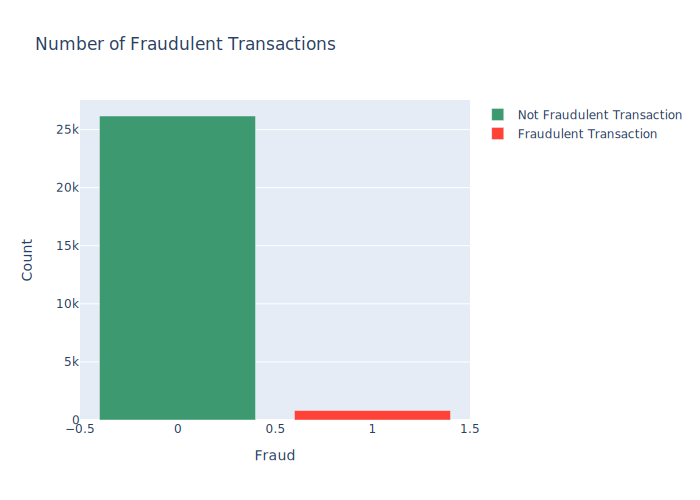

In [66]:

trace0 = go.Bar(
            x = df[df["fraude"]== False]["fraude"].value_counts().index.values,
            y = df[df["fraude"]== False]["fraude"].value_counts().values,
            name='Not Fraudulent Transaction',marker=dict(color='#3D9970'))

trace1 = go.Bar(
            x = df[df["fraude"]== True]["fraude"].value_counts().index.values,
            y = df[df["fraude"]== True]["fraude"].value_counts().values,
            name='Fraudulent Transaction',marker=dict(color='#FF4136'))

data = [trace0, trace1]

layout = go.Layout()

layout = go.Layout(
    yaxis=dict(title='Count'),
    xaxis=dict(title='Fraud'),
    title='Number of Fraudulent Transactions')

fig = go.Figure(data=data, layout=layout)

#py.iplot(fig, filename='grouped-bar')

fig.show('svg')

- We can see that not fraudulent transactions were 26,165 and just 810 were really fraudulent transactions
***

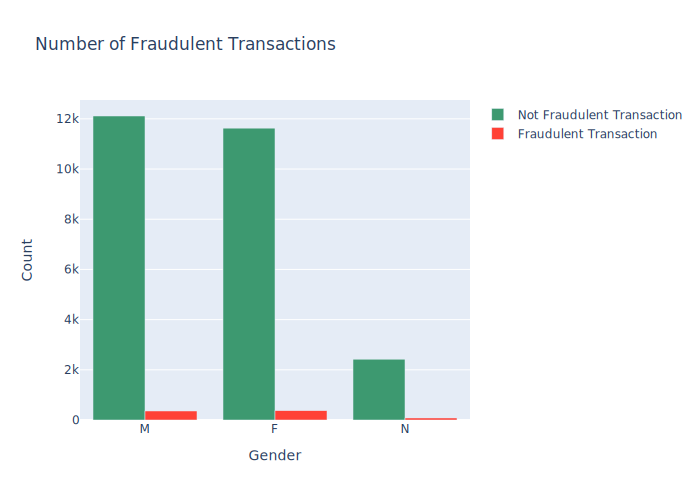

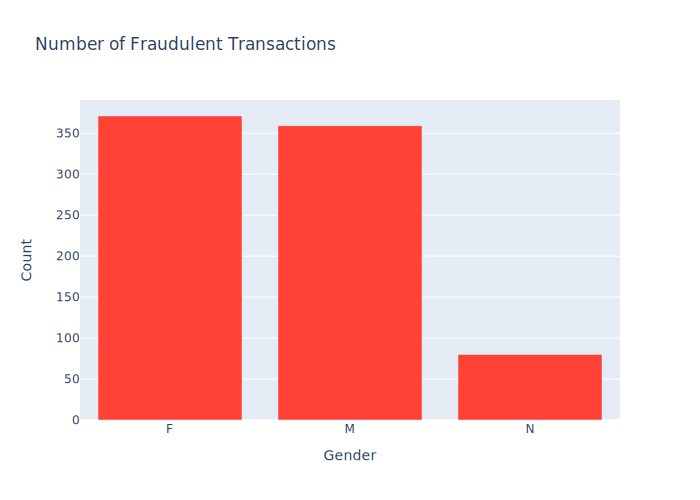

In [67]:

trace0 = go.Bar(
            x = df[df["fraude"]== False]["género"].value_counts().index.values,
            y = df[df["fraude"]== False]["género"].value_counts().values,
            name='Not Fraudulent Transaction',marker=dict(color='#3D9970'))

trace1 = go.Bar(
            x = df[df["fraude"]== True]["género"].value_counts().index.values,
            y = df[df["fraude"]== True]["género"].value_counts().values,
            name='Fraudulent Transaction',marker=dict(color='#FF4136'))

data = [trace0, trace1]

layout = go.Layout()

layout = go.Layout(
    yaxis=dict(title='Count'),
    xaxis=dict(title='Gender'),
    title='Number of Fraudulent Transactions')

fig = go.Figure(data=data, layout=layout)
fig1 = go.Figure(data=trace1,layout=layout)

#py.iplot(fig, filename='grouped-bar')
#py.iplot(fig1, filename='grouped-bar')

fig.show('svg')
print()
fig1.show('svg')

- There are almost the same amount of men and woman with fraudulent transactions

In [68]:
df_good = df[df["fraude"] == False]
df_bad = df[df["fraude"] == True]

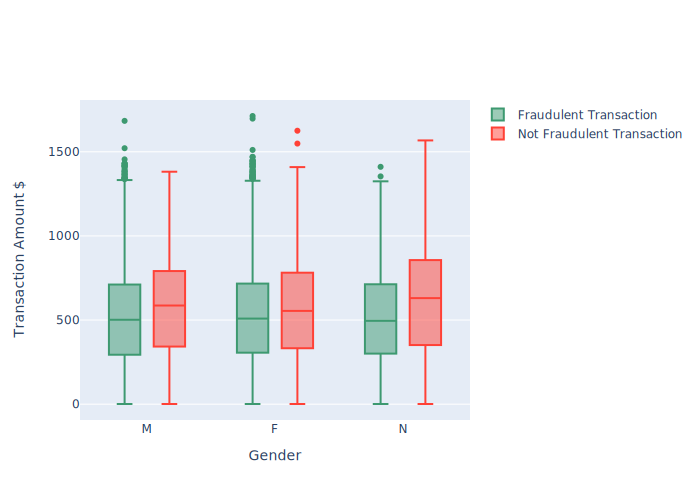

In [72]:
trace0 = go.Box(
    y=df_good["monto"],
    x=df_good["género"],
    name='Fraudulent Transaction',
    marker=dict(color='#3D9970'))

trace1 = go.Box(
    y=df_bad['monto'],
    x=df_bad['género'],
    name='Not Fraudulent Transaction',
    marker=dict(color='#FF4136'))
    
data = [trace0, trace1]

layout = go.Layout(yaxis=dict(title='Transaction Amount $',zeroline=False),
                   xaxis=dict(title='Gender'),boxmode='group')
fig = go.Figure(data=data, layout=layout)

#py.iplot(fig, filename='box-age-cat')
fig.show('svg')

***

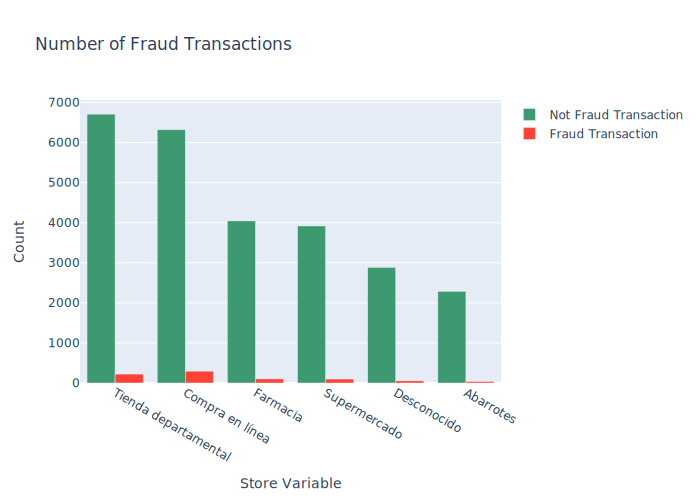

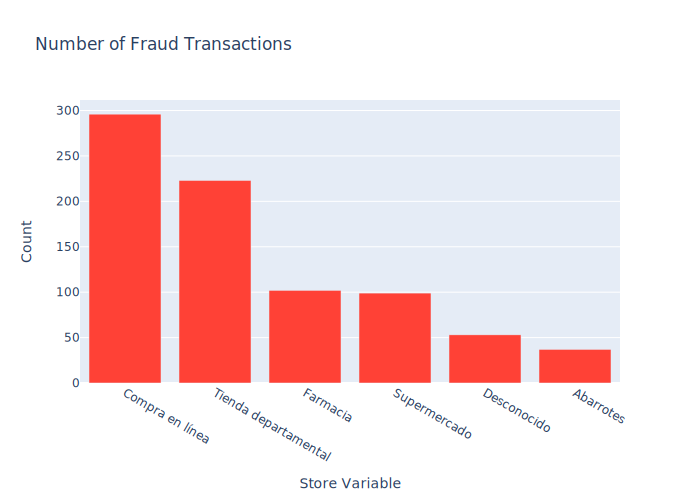

In [74]:
trace0 = go.Bar(
            x = df[df["fraude"]== False]["establecimiento"].value_counts().index.values,
            y = df[df["fraude"]== False]["establecimiento"].value_counts().values,
            name='Not Fraud Transaction',marker=dict(color='#3D9970'))

trace1 = go.Bar(
            x = df[df["fraude"]== True]["establecimiento"].value_counts().index.values,
            y = df[df["fraude"]== True]["establecimiento"].value_counts().values,
            name='Fraud Transaction',marker=dict(color='#FF4136'))

data = [trace0, trace1]

layout = go.Layout()

layout = go.Layout(
    yaxis=dict(title='Count'),
    xaxis=dict(title='Store Variable'),
    title='Number of Fraud Transactions')

fig = go.Figure(data=data, layout=layout)
fig1 = go.Figure(data=trace1,layout=layout)

#py.iplot(fig, filename='grouped-bar')
#py.iplot(fig1, filename='grouped-bar')

fig.show('svg')
fig1.show('svg')

- The stores with more fraudulent transactions are 'Compras en Línea' and 'Tiendas Departamentales'.

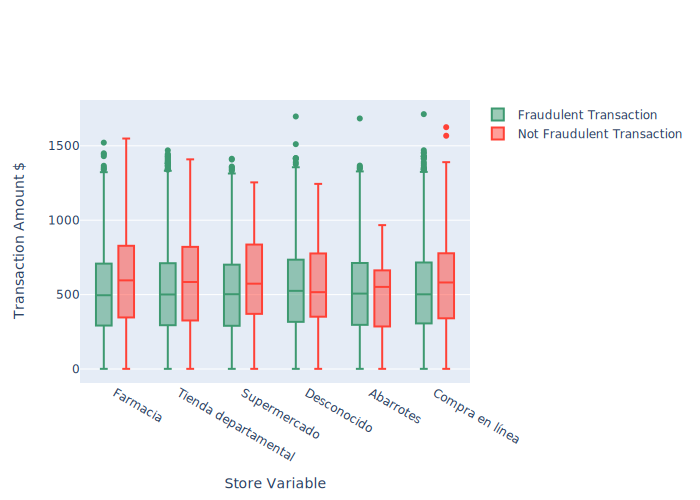

In [78]:
trace0 = go.Box(
    y=df_good["monto"],
    x=df_good["establecimiento"],
    name='Fraudulent Transaction',
    marker=dict(color='#3D9970'))

trace1 = go.Box(
    y=df_bad['monto'],
    x=df_bad['establecimiento'],
    name='Not Fraudulent Transaction',
    marker=dict(color='#FF4136'))
    
data = [trace0, trace1]

layout = go.Layout(yaxis=dict(title='Transaction Amount $',zeroline=False),
                   xaxis=dict(title='Store Variable'),boxmode='group')
fig = go.Figure(data=data, layout=layout)



fig.show('svg')

***

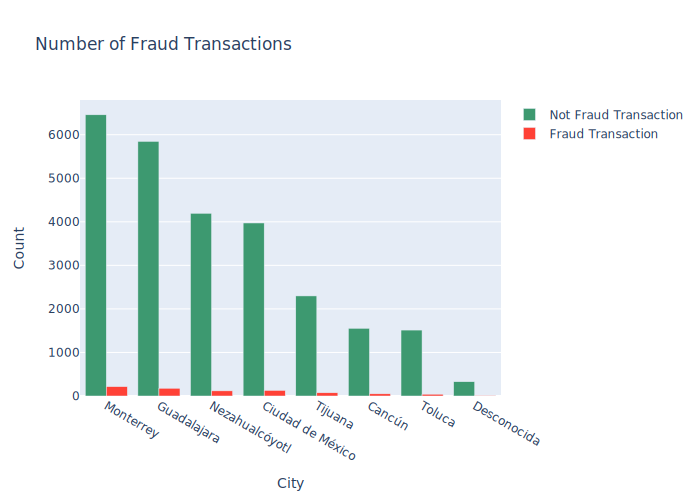

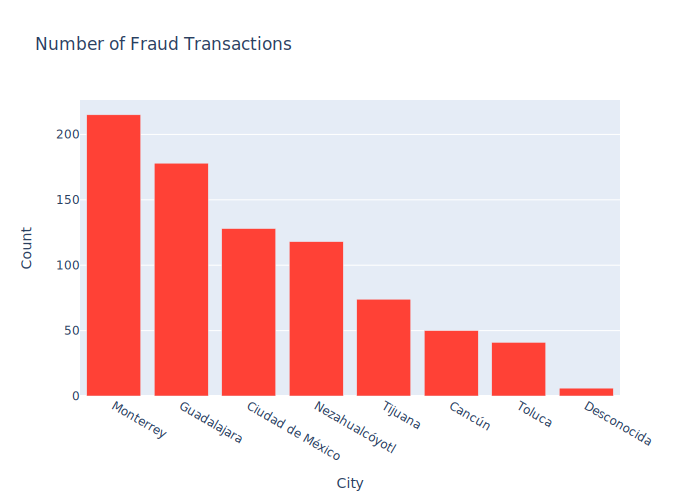

In [79]:
trace0 = go.Bar(
            x = df[df["fraude"]== False]["ciudad"].value_counts().index.values,
            y = df[df["fraude"]== False]["ciudad"].value_counts().values,
            name='Not Fraud Transaction',marker=dict(color='#3D9970'))

trace1 = go.Bar(
            x = df[df["fraude"]== True]["ciudad"].value_counts().index.values,
            y = df[df["fraude"]== True]["ciudad"].value_counts().values,
            name='Fraud Transaction',marker=dict(color='#FF4136'))

data = [trace0, trace1]

layout = go.Layout()

layout = go.Layout(
    yaxis=dict(title='Count'),
    xaxis=dict(title='City'),
    title='Number of Fraud Transactions')

fig = go.Figure(data=data, layout=layout)
fig1 = go.Figure(data=trace1,layout=layout)

fig.show('svg')
fig1.show('svg')

- The cities with more fraudulent transactions are 'Monterrey' and 'Guadalajara'.

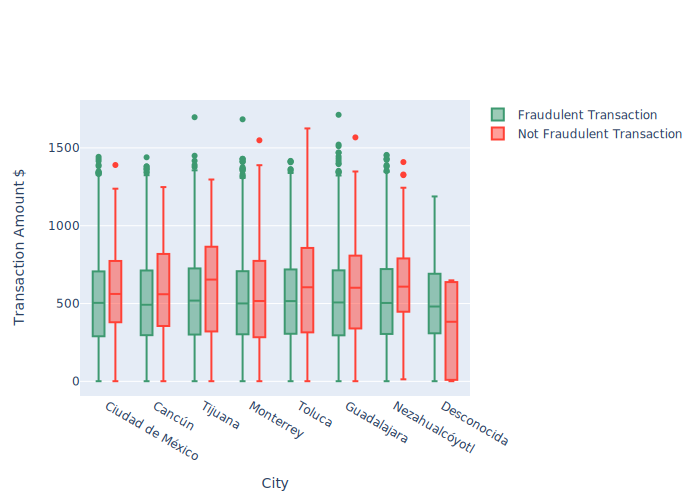

In [80]:
trace0 = go.Box(
    y=df_good["monto"],
    x=df_good["ciudad"],
    name='Fraudulent Transaction',
    marker=dict(color='#3D9970'))

trace1 = go.Box(
    y=df_bad['monto'],
    x=df_bad['ciudad'],
    name='Not Fraudulent Transaction',
    marker=dict(color='#FF4136'))
    
data = [trace0, trace1]

layout = go.Layout(yaxis=dict(title='Transaction Amount $',zeroline=False),
                   xaxis=dict(title='City'),boxmode='group')
fig = go.Figure(data=data, layout=layout)


fig.show('svg')

***

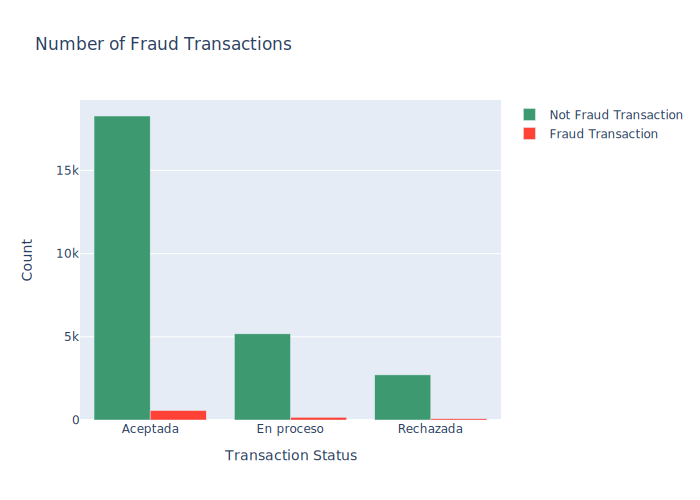

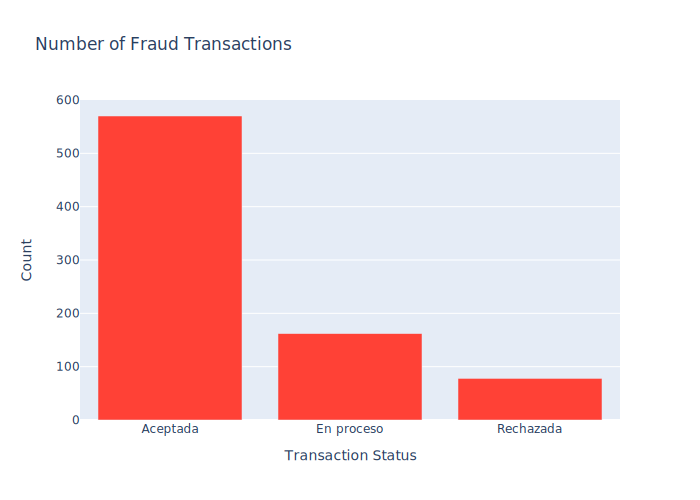

In [81]:
trace0 = go.Bar(
            x = df[df["fraude"]== False]["status_txn"].value_counts().index.values,
            y = df[df["fraude"]== False]["status_txn"].value_counts().values,
            name='Not Fraud Transaction',marker=dict(color='#3D9970'))

trace1 = go.Bar(
            x = df[df["fraude"]== True]["status_txn"].value_counts().index.values,
            y = df[df["fraude"]== True]["status_txn"].value_counts().values,
            name='Fraud Transaction',marker=dict(color='#FF4136'))

data = [trace0, trace1]

layout = go.Layout()

layout = go.Layout(
    yaxis=dict(title='Count'),
    xaxis=dict(title='Transaction Status'),
    title='Number of Fraud Transactions')

fig = go.Figure(data=data, layout=layout)
fig1 = go.Figure(data=trace1,layout=layout)

fig.show('svg')
fig1.show('svg')

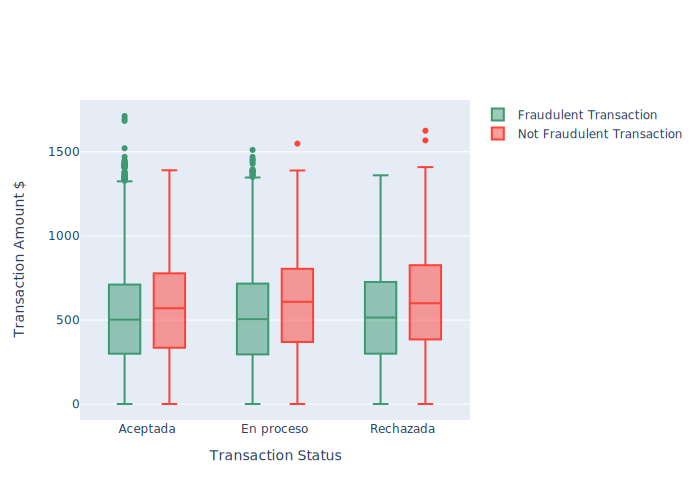

In [88]:
trace0 = go.Box(
    y=df_good["monto"],
    x=df_good["status_txn"],
    name='Fraudulent Transaction',
    marker=dict(color='#3D9970'))

trace1 = go.Box(
    y=df_bad['monto'],
    x=df_bad['status_txn'],
    name='Not Fraudulent Transaction',
    marker=dict(color='#FF4136'))
    
data = [trace0, trace1]

layout = go.Layout(yaxis=dict(title='Transaction Amount $',zeroline=False),
                   xaxis=dict(title='Transaction Status'),boxmode='group')
fig = go.Figure(data=data, layout=layout)

fig.show('svg')

***

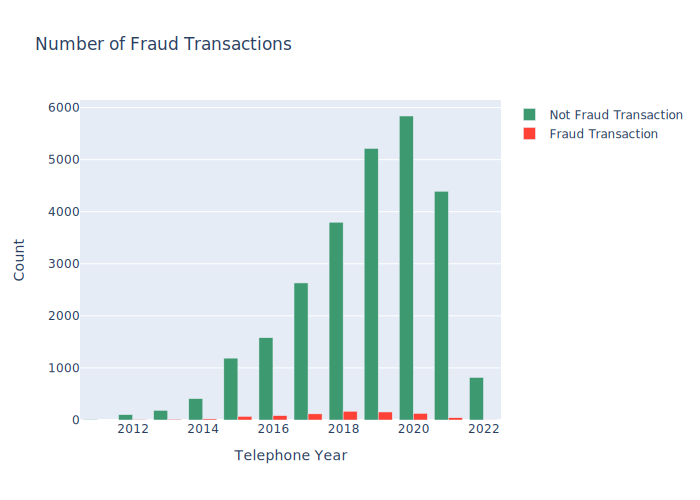

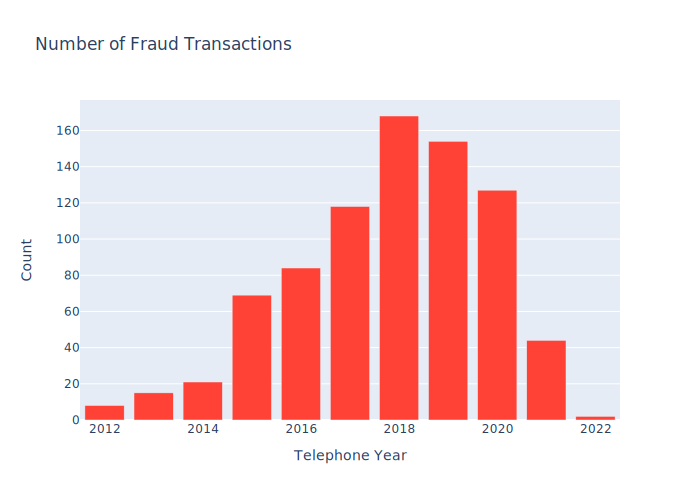

In [83]:
trace0 = go.Bar(
            x = df[df["fraude"]== False]["año telofono"].value_counts().index.values,
            y = df[df["fraude"]== False]["año telofono"].value_counts().values,
            name='Not Fraud Transaction',marker=dict(color='#3D9970'))

trace1 = go.Bar(
            x = df[df["fraude"]== True]["año telofono"].value_counts().index.values,
            y = df[df["fraude"]== True]["año telofono"].value_counts().values,
            name='Fraud Transaction',marker=dict(color='#FF4136'))

data = [trace0, trace1]

layout = go.Layout()

layout = go.Layout(
    yaxis=dict(title='Count'),
    xaxis=dict(title='Telephone Year'),
    title='Number of Fraud Transactions')


fig = go.Figure(data=data, layout=layout)
fig1 = go.Figure(data=trace1,layout=layout)

fig.show('svg')
fig1.show('svg')

- Telephones of the years 2017, 2018 and 2019 are related with more fruadulent transactions 

***

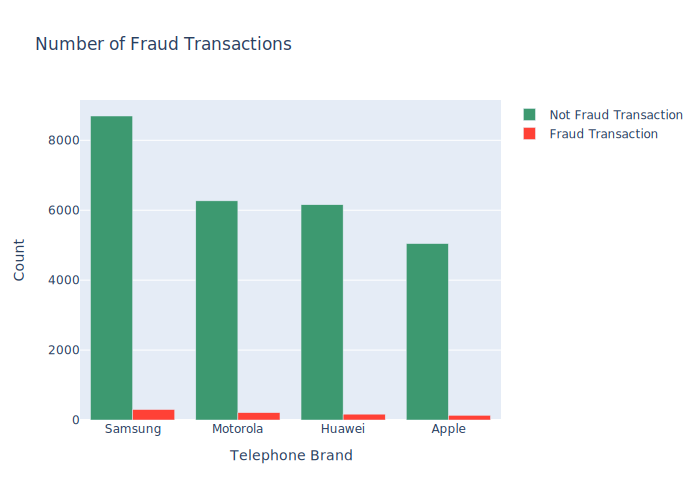

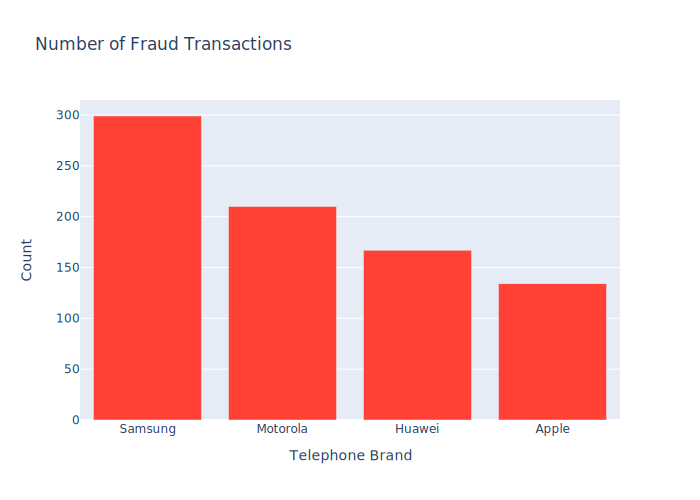

In [84]:
trace0 = go.Bar(
            x = df[df["fraude"]== False]["marca telofono"].value_counts().index.values,
            y = df[df["fraude"]== False]["marca telofono"].value_counts().values,
            name='Not Fraud Transaction',marker=dict(color='#3D9970'))

trace1 = go.Bar(
            x = df[df["fraude"]== True]["marca telofono"].value_counts().index.values,
            y = df[df["fraude"]== True]["marca telofono"].value_counts().values,
            name='Fraud Transaction',marker=dict(color='#FF4136'))

data = [trace0, trace1]

layout = go.Layout()

layout = go.Layout(
    yaxis=dict(title='Count'),
    xaxis=dict(title='Telephone Brand'),
    title='Number of Fraud Transactions')


fig = go.Figure(data=data, layout=layout)
fig1 = go.Figure(data=trace1,layout=layout)

fig.show('svg')
fig1.show('svg')

- People with a Samsung telephone are the ones with more fraudulent transactions, on the other hand most of the people has a samsung.
***

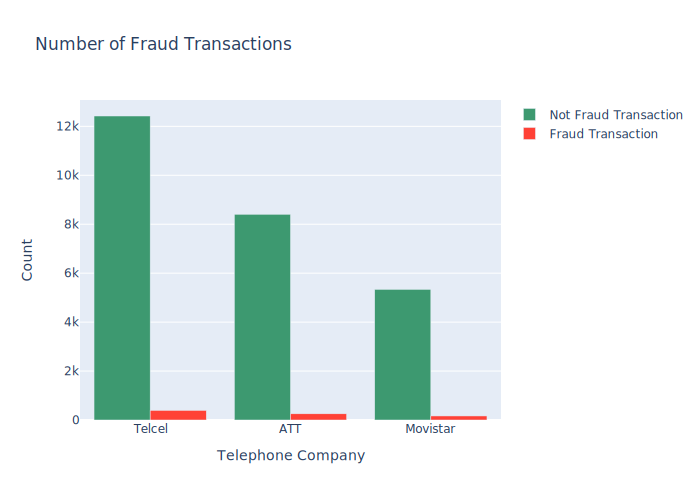

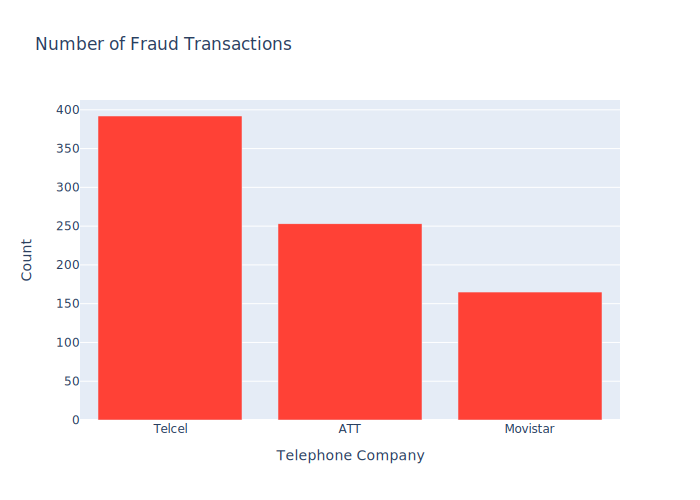

In [85]:
trace0 = go.Bar(
            x = df[df["fraude"]== False]["proveedor telofono"].value_counts().index.values,
            y = df[df["fraude"]== False]["proveedor telofono"].value_counts().values,
            name='Not Fraud Transaction',marker=dict(color='#3D9970'))

trace1 = go.Bar(
            x = df[df["fraude"]== True]["proveedor telofono"].value_counts().index.values,
            y = df[df["fraude"]== True]["proveedor telofono"].value_counts().values,
            name='Fraud Transaction',marker=dict(color='#FF4136'))

data = [trace0, trace1]

layout = go.Layout()

layout = go.Layout(
    yaxis=dict(title='Count'),
    xaxis=dict(title='Telephone Company'),
    title='Number of Fraud Transactions')

fig = go.Figure(data=data, layout=layout)
fig1 = go.Figure(data=trace1,layout=layout)

fig.show('svg')
fig1.show('svg')

- The people with more fraudulent transactions are the ones with a Telcel phone, on the other hand Telcel it's the company with more clients.
***

# **5. Preprocessing Data:** 
- Transform categorical variables to dummy variables
- Drop variables which are not usefull

In [86]:
df['fraude']=df['fraude'].astype('int')
df0 = df[['user_id','linea_tc','interes_tc','monto','hora','dcto','cashback','fraude','dia','año telofono','género','establecimiento','ciudad','status_txn','is_prime','marca telofono','proveedor telofono']]
df0

,user_id,linea_tc,interes_tc,monto,hora,dcto,cashback,fraude,dia,año telofono,género,establecimiento,ciudad,status_txn,is_prime,marca telofono,proveedor telofono
0,573,87000,56,581.03,0,0.00,17.43,0,2,2019,M,Farmacia,Ciudad de México,Aceptada,False,Apple,Telcel
1,737,34000,51,421.73,0,0.00,12.65,0,2,2021,F,Tienda departamental,Cancún,Aceptada,False,Huawei,ATT
2,887,52000,38,399.55,0,0.00,11.99,0,2,2017,F,Farmacia,Tijuana,En proceso,False,Apple,ATT
3,1304,67000,60,828.01,0,0.00,24.84,0,2,2019,M,Tienda departamental,Ciudad de México,En proceso,False,Samsung,ATT
4,1361,28000,52,886.04,0,0.00,26.58,0,2,2021,F,Supermercado,Cancún,Aceptada,False,Samsung,Telcel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26970,3368,30000,38,701.61,23,0.00,21.05,0,30,2019,F,Tienda departamental,Ciudad de México,Aceptada,False,Samsung,Telcel
26971,3460,47000,35,368.91,23,18.45,11.07,0,30,2021,M,Supermercado,Tijuana,Aceptada,False,Samsung,ATT
26972,3504,77000,37,108.18,23,0.00,3.25,0,30,2020,M,Abarrotes,Guadalajara,Aceptada,False,Samsung,Telcel
26973,3581,89000,54,1308.53,23,0.00,39.26,0,30,2018,N,Abarrotes,Guadalajara,Aceptada,False,Apple,Telcel


In [87]:
df2 = pd.get_dummies(df0, columns=['género','establecimiento','ciudad','status_txn','is_prime','marca telofono','proveedor telofono'])
df2

,user_id,linea_tc,interes_tc,monto,hora,dcto,cashback,fraude,dia,año telofono,...,status_txn_Rechazada,is_prime_False,is_prime_True,marca telofono_Apple,marca telofono_Huawei,marca telofono_Motorola,marca telofono_Samsung,proveedor telofono_ATT,proveedor telofono_Movistar,proveedor telofono_Telcel
0,573,87000,56,581.03,0,0.00,17.43,0,2,2019,...,0,1,0,1,0,0,0,0,0,1
1,737,34000,51,421.73,0,0.00,12.65,0,2,2021,...,0,1,0,0,1,0,0,1,0,0
2,887,52000,38,399.55,0,0.00,11.99,0,2,2017,...,0,1,0,1,0,0,0,1,0,0
3,1304,67000,60,828.01,0,0.00,24.84,0,2,2019,...,0,1,0,0,0,0,1,1,0,0
4,1361,28000,52,886.04,0,0.00,26.58,0,2,2021,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26970,3368,30000,38,701.61,23,0.00,21.05,0,30,2019,...,0,1,0,0,0,0,1,0,0,1
26971,3460,47000,35,368.91,23,18.45,11.07,0,30,2021,...,0,1,0,0,0,0,1,1,0,0
26972,3504,77000,37,108.18,23,0.00,3.25,0,30,2020,...,0,1,0,0,0,0,1,0,0,1
26973,3581,89000,54,1308.53,23,0.00,39.26,0,30,2018,...,0,1,0,1,0,0,0,0,0,1


# **6. Machine Learning Algorithms:** 

# KNeighbors Classifier

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

X= df2.drop(columns=['fraude'])
y =df2['fraude']

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=100,test_size=0.2)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train,y_train)

pred = knn.predict(X_test)

print('The Confusion Matrix of the model is: \n')
print(pd.DataFrame(confusion_matrix(y_test,pred)))
print('\n Here is the Classification Report: \n')
print(classification_report(y_test,pred))

The Confusion Matrix of the model is: 

      0  1
0  5232  1
1   162  0

 Here is the Classification Report: 

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5233
           1       0.00      0.00      0.00       162

    accuracy                           0.97      5395
   macro avg       0.48      0.50      0.49      5395
weighted avg       0.94      0.97      0.96      5395



In [25]:
from collections import Counter
from imblearn.over_sampling import SMOTE


print('Original dataset shape %s' % Counter(y))

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 26165, 1: 810})
Resampled dataset shape Counter({0: 26165, 1: 26165})


In [26]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,stratify=y_res,random_state=100,test_size=0.2)

In [28]:
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train, y_train)

algo_pred = model.predict(X_test)

print('The Confusion Matrix of the model is: \n')
print(pd.DataFrame(confusion_matrix(y_test, algo_pred)))
print('\n Here is the Classification Report: \n')
print(classification_report(y_test, algo_pred))

The Confusion Matrix of the model is: 

      0     1
0  4449   784
1   680  4553

 Here is the Classification Report: 

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      5233
           1       0.85      0.87      0.86      5233

    accuracy                           0.86     10466
   macro avg       0.86      0.86      0.86     10466
weighted avg       0.86      0.86      0.86     10466



We can see how the performance of the model increased after the over sampling, now let's see how works with different number of n_neighbors

***


In [29]:
start = time.process_time()

train_score = []
test_score = []
numeros = range(1,10)

for i in numeros:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    
    train_score.append(knn.score(X_train,y_train))
    test_score.append(knn.score(X_test,y_test))
    
print('El tiempo que demoro el modelo fue {} minutos'.format( round((time.process_time() - start)/60,2) ) )

El tiempo que demoro el modelo fue 4.07 minutos


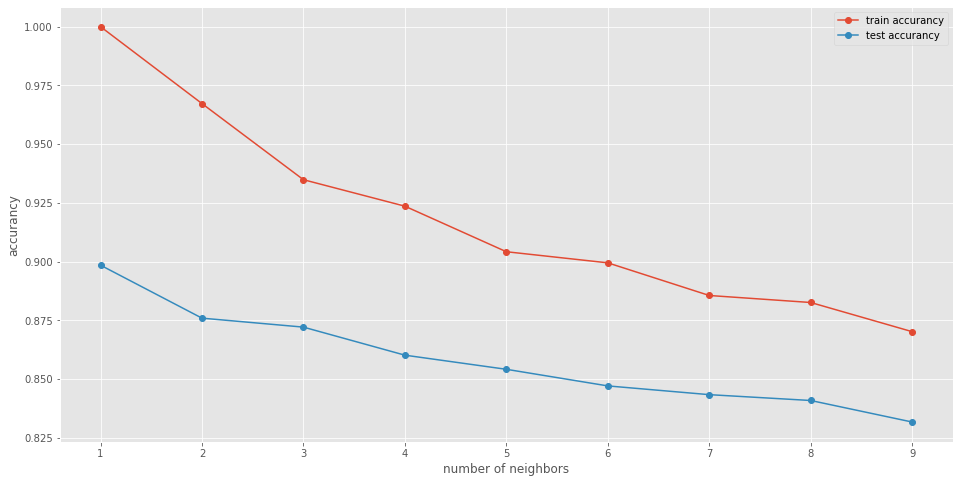

In [30]:
plt.figure(figsize=(16,8))
plt.plot(numeros,train_score,label='train accurancy', marker='o')
plt.plot(numeros,test_score,label='test accurancy', marker='o')
plt.xlabel('number of neighbors')
plt.ylabel('accurancy')
plt.legend()

plt.show()

- From the previous graph we know that the number of n_neighbors that performs better is 1, so we will be using that number for the following results

In [31]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

algo_pred = model.predict(X_test)

print('The Confusion Matrix of the model is: \n')
print(pd.DataFrame(confusion_matrix(y_test, algo_pred)))
print('\n Here is the Classification Report: \n')
print(classification_report(y_test, algo_pred))

The Confusion Matrix of the model is: 

      0     1
0  4509   724
1   339  4894

 Here is the Classification Report: 

              precision    recall  f1-score   support

           0       0.93      0.86      0.89      5233
           1       0.87      0.94      0.90      5233

    accuracy                           0.90     10466
   macro avg       0.90      0.90      0.90     10466
weighted avg       0.90      0.90      0.90     10466



- The performance of the model was good, however let's see how works with others Folds
- Now we're going to valide our results using Stratified KFold

In [32]:
start = time.process_time()

from sklearn.model_selection import StratifiedKFold


precision_list = []
recall_list = []
f1_list = []

skf = StratifiedKFold(n_splits=15,random_state=100,shuffle=True)
skf.get_n_splits(X_res,y_res)

for train_index, test_index in skf.split(X_res,y_res):
    #print('Train:',train_index,'Validation',test_index)
    X1_train, X1_test = X_res.iloc[train_index], X_res.iloc[test_index]
    y1_train, y1_test = y_res.iloc[train_index], y_res.iloc[test_index]
    
    model.fit(X1_train,y1_train)
    pred = model.predict(X1_test)
    
    
    precision_list.append(precision_score(y1_test,pred, average="macro").round(6))
    recall_list.append(recall_score(y1_test,pred, average="macro").round(6))
    f1_list.append(f1_score(pred, y1_test, average="macro").round(6))

    
t1 = pd.DataFrame(precision_list,columns=['Precision (Macro)'])
t2 = pd.DataFrame(recall_list,columns=['Recall (Macro)'])
t3 = pd.DataFrame(f1_list,columns=['F1 Score (Macro)'])

frames = [t1, t2, t3]
result = pd.concat(frames,axis=1)


result['index'] =  'Stratified Fold' +' '+ (result.index +1).astype('str')

result.set_index('index',inplace=True)

result

,Precision (Macro),Recall (Macro),F1 Score (Macro)
index,,,
Stratified Fold 1,0.910800,0.909152,0.909053
Stratified Fold 2,0.904054,0.900844,0.900635
Stratified Fold 3,0.904539,0.902275,0.902128
Stratified Fold 4,0.910165,0.908579,0.908482
Stratified Fold 5,0.913379,0.910302,0.910123
Stratified Fold 6,0.912024,0.910280,0.910194
Stratified Fold 7,0.913301,0.911426,0.911335
Stratified Fold 8,0.910536,0.907985,0.907852
Stratified Fold 9,0.906148,0.904548,0.904462


- Here we can see the information of the Stratified KFold in a Dataframe.


# **KNeighbors Classifier Results:** 

The performance of KNeighbors Classifier was not bad, but there are better models 
- Precision has an average of 90.82 %
- Recall has an average of 90.60 %
- F1 Score has an average of 90.59 %

In [33]:
print('Precision Mean of all Stratified Folds is: {}'.format(np.array(precision_list).mean().round(6)))
print()
print('Recall Mean of all Stratified Folds is: {}'.format(np.array(recall_list).mean().round(6)))
print()
print('F1 Score Mean of all Stratified Folds is: {}'.format(np.array(f1_list).mean().round(6)))

Precision Mean of all Stratified Folds is: 0.908291

Recall Mean of all Stratified Folds is: 0.906058

F1 Score Mean of all Stratified Folds is: 0.905928


***

# Logistc Regression

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

X= df2.drop(columns=['fraude'])
y =df2['fraude']

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=100,test_size=0.2)

In [35]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(max_iter=100000)

log.fit(X_train,y_train)

pred = log.predict(X_test)

print('The Confusion Matrix of the model is: \n')
print(pd.DataFrame(confusion_matrix(y_test,pred)))
print('\n Here is the Classification Report: \n')
print(classification_report(y_test,pred))

The Confusion Matrix of the model is: 

      0  1
0  5233  0
1   161  1

 Here is the Classification Report: 

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5233
           1       1.00      0.01      0.01       162

    accuracy                           0.97      5395
   macro avg       0.99      0.50      0.50      5395
weighted avg       0.97      0.97      0.96      5395



- The performace of the model it's good for precision but really bad for recall

- Let's use the process of over sampling to deal with this problem 

In [36]:
from collections import Counter
from imblearn.over_sampling import SMOTE


print('Original dataset shape %s' % Counter(y))

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 26165, 1: 810})
Resampled dataset shape Counter({0: 26165, 1: 26165})


In [37]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,stratify=y_res,random_state=100,test_size=0.2)

In [38]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=100000)

model.fit(X_train,y_train)

pred = model.predict(X_test)

print('The Confusion Matrix of the model is: \n')
print(pd.DataFrame(confusion_matrix(y_test,pred)))
print('\n Here is the Classification Report: \n')
print(classification_report(y_test,pred))

The Confusion Matrix of the model is: 

      0     1
0  5104   129
1   353  4880

 Here is the Classification Report: 

              precision    recall  f1-score   support

           0       0.94      0.98      0.95      5233
           1       0.97      0.93      0.95      5233

    accuracy                           0.95     10466
   macro avg       0.95      0.95      0.95     10466
weighted avg       0.95      0.95      0.95     10466



- The performance has improved a lot, however we need to try with different K Folds in order to know if the model it's good or not.

- Now we're going to valide our results using Stratified KFold

In [39]:
start = time.process_time()

from sklearn.model_selection import StratifiedKFold


precision_list = []
recall_list = []
f1_list = []

skf = StratifiedKFold(n_splits=15,random_state=100,shuffle=True)
skf.get_n_splits(X_res,y_res)

for train_index, test_index in skf.split(X_res,y_res):
    #print('Train:',train_index,'Validation',test_index)
    X1_train, X1_test = X_res.iloc[train_index], X_res.iloc[test_index]
    y1_train, y1_test = y_res.iloc[train_index], y_res.iloc[test_index]
    
    model.fit(X1_train,y1_train)
    pred = model.predict(X1_test)
    
    
    precision_list.append(precision_score(y1_test,pred, average="macro").round(6))
    recall_list.append(recall_score(y1_test,pred, average="macro").round(6))
    f1_list.append(f1_score(pred, y1_test, average="macro").round(6))
    
    
t1 = pd.DataFrame(precision_list,columns=['Precision (Macro)'])
t2 = pd.DataFrame(recall_list,columns=['Recall (Macro)'])
t3 = pd.DataFrame(f1_list,columns=['F1 Score (Macro)'])

frames = [t1, t2, t3]
result = pd.concat(frames,axis=1)


result['index'] =  'Stratified Fold' +' '+ (result.index +1).astype('str')

result.set_index('index',inplace=True)

result

,Precision (Macro),Recall (Macro),F1 Score (Macro)
index,,,
Stratified Fold 1,0.689805,0.679244,0.674742
Stratified Fold 2,0.952978,0.952129,0.952113
Stratified Fold 3,0.675063,0.667210,0.663455
Stratified Fold 4,0.662069,0.652875,0.647904
Stratified Fold 5,0.953061,0.951841,0.951816
Stratified Fold 6,0.681655,0.668997,0.663103
Stratified Fold 7,0.671380,0.658967,0.652652
Stratified Fold 8,0.670417,0.665259,0.662690
Stratified Fold 9,0.959977,0.959591,0.959579


- Here we can see the information of the Stratified KFold in a Dataframe.


# **Logistic Regression Results:** 

The performance of model on avarage was lower than in the previous example, the reason why it's because there are some folds where the performance it's very bad. 
In adittion, the performance of Logistic Regression is worst than KNeighbors performance.

Final results are:
- Precision has an average of 77.11 %
- Recall has an average of 76.50 %
- F1 Score has an average of 76.22 %

In [40]:
print('Precision Mean of all Stratified Folds is: {}'.format(np.array(precision_list).mean().round(6)))
print()
print('Recall Mean of all Stratified Folds is: {}'.format(np.array(recall_list).mean().round(6)))
print()
print('F1 Score Mean of all Stratified Folds is: {}'.format(np.array(f1_list).mean().round(6)))

Precision Mean of all Stratified Folds is: 0.771195

Recall Mean of all Stratified Folds is: 0.765031

F1 Score Mean of all Stratified Folds is: 0.762232


***

# Random Forest

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

X= df2.drop(columns=['fraude'])
y =df2['fraude']

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=100,test_size=0.2)

In [42]:
#  Gradient boosted regression trees (gradient boosting machines)
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=10,max_depth=5, random_state=0)
forest.fit(X_train,y_train)
pred = forest.predict(X_test)

print('The Confusion Matrix of the model is: \n')
print(pd.DataFrame(confusion_matrix(y_test, pred)))
print('\n Here is the Classification Report: \n')
print(classification_report(y_test, pred))

The Confusion Matrix of the model is: 

      0  1
0  5233  0
1   162  0

 Here is the Classification Report: 

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5233
           1       0.00      0.00      0.00       162

    accuracy                           0.97      5395
   macro avg       0.48      0.50      0.49      5395
weighted avg       0.94      0.97      0.96      5395



/Users/eduardocastro/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/eduardocastro/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/eduardocastro/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Here the precision and recall for fruad was awful.

- Let's use the process of over sampling to see if the problem can be solved

In [43]:
from collections import Counter
from imblearn.over_sampling import SMOTE


print('Original dataset shape %s' % Counter(y))

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 26165, 1: 810})
Resampled dataset shape Counter({0: 26165, 1: 26165})


In [44]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,stratify=y_res,random_state=100,test_size=0.2)

In [45]:
model = RandomForestClassifier(n_estimators=10,max_depth=5, random_state=0)
model.fit(X_train, y_train)

algo_pred = model.predict(X_test)

print('The Confusion Matrix of the model is: \n')
print(pd.DataFrame(confusion_matrix(y_test, algo_pred)))
print('\n Here is the Classification Report: \n')
print(classification_report(y_test, algo_pred))

The Confusion Matrix of the model is: 

      0     1
0  4583   650
1   636  4597

 Here is the Classification Report: 

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      5233
           1       0.88      0.88      0.88      5233

    accuracy                           0.88     10466
   macro avg       0.88      0.88      0.88     10466
weighted avg       0.88      0.88      0.88     10466



The perfomance improves a lot after the over sampling, now let see how works with different Folds

- Now we're going to valide our results using Stratified KFold

In [47]:
start = time.process_time()

from sklearn.model_selection import StratifiedKFold


precision_list = []
recall_list = []
f1_list = []

skf = StratifiedKFold(n_splits=15,random_state=100,shuffle=True)
skf.get_n_splits(X_res,y_res)

for train_index, test_index in skf.split(X_res,y_res):
    #print('Train:',train_index,'Validation',test_index)
    X1_train, X1_test = X_res.iloc[train_index], X_res.iloc[test_index]
    y1_train, y1_test = y_res.iloc[train_index], y_res.iloc[test_index]
    
    model.fit(X1_train,y1_train)
    pred = model.predict(X1_test)
    
    
    precision_list.append(precision_score(y1_test,pred, average="macro").round(6))
    recall_list.append(recall_score(y1_test,pred, average="macro").round(6))
    f1_list.append(f1_score(pred, y1_test, average="macro").round(6))
    
    
t1 = pd.DataFrame(precision_list,columns=['Precision (Macro)'])
t2 = pd.DataFrame(recall_list,columns=['Recall (Macro)'])
t3 = pd.DataFrame(f1_list,columns=['F1 Score (Macro)'])

frames = [t1, t2, t3]
result = pd.concat(frames,axis=1)


result['index'] =  'Stratified Fold' +' '+ (result.index +1).astype('str')

result.set_index('index',inplace=True)

result

,Precision (Macro),Recall (Macro),F1 Score (Macro)
index,,,
Stratified Fold 1,0.870164,0.870163,0.870163
Stratified Fold 2,0.878190,0.878189,0.878189
Stratified Fold 3,0.866669,0.866441,0.866417
Stratified Fold 4,0.883921,0.883921,0.883921
Stratified Fold 5,0.872880,0.872461,0.872421
Stratified Fold 6,0.867586,0.867584,0.867584
Stratified Fold 7,0.867042,0.867009,0.867007
Stratified Fold 8,0.861174,0.860988,0.860973
Stratified Fold 9,0.872090,0.871880,0.871864


- Here we can see the information of the Stratified KFolds in a Dataframe.


# **Random Forest Results:** 

The performance of Random Forest was better than Logistic Regression, but worst than K Neighbors performance.

Final results are:
- Precision has an average of 87.25  %
- Recall has an average of 87.24 %
- F1 Score has an average of 87.24 %

In [48]:
print('Precision Mean of all Stratified Folds is: {}'.format(np.array(precision_list).mean().round(6)))
print()
print('Recall Mean of all Stratified Folds is: {}'.format(np.array(recall_list).mean().round(6)))
print()
print('F1 Score Mean of all Stratified Folds is: {}'.format(np.array(f1_list).mean().round(6)))

Precision Mean of all Stratified Folds is: 0.872583

Recall Mean of all Stratified Folds is: 0.872444

F1 Score Mean of all Stratified Folds is: 0.872432


***

# Gradien Boost Classifier

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

X= df2.drop(columns=['fraude'])
y =df2['fraude']

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=100,test_size=0.2)

In [50]:
#  Gradient boosted regression trees (gradient boosting machines)
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
pred = gbrt.predict(X_test)

print('The Confusion Matrix of the model is: \n')
print(pd.DataFrame(confusion_matrix(y_test, pred)))
print('\n Here is the Classification Report: \n')
print(classification_report(y_test, pred))

The Confusion Matrix of the model is: 

      0  1
0  5229  4
1   161  1

 Here is the Classification Report: 

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5233
           1       0.20      0.01      0.01       162

    accuracy                           0.97      5395
   macro avg       0.59      0.50      0.50      5395
weighted avg       0.95      0.97      0.96      5395



As well as in Random Forest the results for precision, recall and f1 score are very bad.

- Let's use the process of over sampling to see if the problem can be solved

In [51]:
from collections import Counter
from imblearn.over_sampling import SMOTE


print('Original dataset shape %s' % Counter(y))

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 26165, 1: 810})
Resampled dataset shape Counter({0: 26165, 1: 26165})


In [52]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,stratify=y_res,random_state=100,test_size=0.2)

In [53]:
model = GradientBoostingClassifier(random_state=0)
model.fit(X_train, y_train)

algo_pred = model.predict(X_test)

print('The Confusion Matrix of the model is: \n')
print(pd.DataFrame(confusion_matrix(y_test, algo_pred)))
print('\n Here is the Classification Report: \n')
print(classification_report(y_test, algo_pred))

The Confusion Matrix of the model is: 

      0     1
0  5230     3
1   279  4954

 Here is the Classification Report: 

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5233
           1       1.00      0.95      0.97      5233

    accuracy                           0.97     10466
   macro avg       0.97      0.97      0.97     10466
weighted avg       0.97      0.97      0.97     10466



The perfomance improved a lot after the over sampling, let see how works with different Folds

- Now we're going to valide our results using Stratified KFold

In [55]:

from sklearn.model_selection import StratifiedKFold


precision_list = []
recall_list = []
f1_list = []

skf = StratifiedKFold(n_splits=15,random_state=100,shuffle=True)
skf.get_n_splits(X_res,y_res)

for train_index, test_index in skf.split(X_res,y_res):
    #print('Train:',train_index,'Validation',test_index)
    X1_train, X1_test = X_res.iloc[train_index], X_res.iloc[test_index]
    y1_train, y1_test = y_res.iloc[train_index], y_res.iloc[test_index]
    
    model.fit(X1_train,y1_train)
    pred = model.predict(X1_test)
    
    
    precision_list.append(precision_score(y1_test,pred, average="macro").round(6))
    recall_list.append(recall_score(y1_test,pred, average="macro").round(6))
    f1_list.append(f1_score(pred, y1_test, average="macro").round(6))
    
    
    
t1 = pd.DataFrame(precision_list,columns=['Precision (Macro)'])
t2 = pd.DataFrame(recall_list,columns=['Recall (Macro)'])
t3 = pd.DataFrame(f1_list,columns=['F1 Score (Macro)'])

frames = [t1, t2, t3]
result = pd.concat(frames,axis=1)


result['index'] =  'Stratified Fold' +' '+ (result.index +1).astype('str')

result.set_index('index',inplace=True)

result

,Precision (Macro),Recall (Macro),F1 Score (Macro)
index,,,
Stratified Fold 1,0.967179,0.965023,0.964992
Stratified Fold 2,0.972900,0.971330,0.971314
Stratified Fold 3,0.975313,0.974198,0.974189
Stratified Fold 4,0.976201,0.975058,0.975049
Stratified Fold 5,0.971237,0.969610,0.969592
Stratified Fold 6,0.973021,0.971633,0.971604
Stratified Fold 7,0.975723,0.974499,0.974475
Stratified Fold 8,0.977446,0.976504,0.976486
Stratified Fold 9,0.978283,0.977364,0.977347


- Here we can see the information of the Stratified KFolds in a Dataframe.


# **Gradien Boost Classifier Results:** 

The performance of Gradien Boost Classifier it's better than Random Forest, KNeighbors and Logistic Regression performance.

Final results are:
- Precision has an average of 97.42  %
- Recall has an average of 97.29 %
- F1 Score has an average of 97.29 %

In [56]:
print('Precision Mean of all Stratified Folds is: {}'.format(np.array(precision_list).mean().round(6)))
print()
print('Recall Mean of all Stratified Folds is: {}'.format(np.array(recall_list).mean().round(6)))
print()
print('F1 Score Mean of all Stratified Folds is: {}'.format(np.array(f1_list).mean().round(6)))

Precision Mean of all Stratified Folds is: 0.974274

Recall Mean of all Stratified Folds is: 0.97296

F1 Score Mean of all Stratified Folds is: 0.972941


***

# XGB Classifier

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

X= df2.drop(columns=['fraude'])
y =df2['fraude']

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=100,test_size=0.2)

In [58]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=100)
xgb.fit(X_train, y_train)

pred = xgb.predict(X_test)

print('The Confusion Matrix of the model is: \n')
print(pd.DataFrame(confusion_matrix(y_test, pred)))
print('\n Here is the Classification Report: \n')
print(classification_report(y_test, pred))

The Confusion Matrix of the model is: 

      0  1
0  5227  6
1   160  2

 Here is the Classification Report: 

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5233
           1       0.25      0.01      0.02       162

    accuracy                           0.97      5395
   macro avg       0.61      0.51      0.50      5395
weighted avg       0.95      0.97      0.96      5395



As well as in Random Forest and Gradien Boost Classifier the results for precision, recall and f1 score are very bad.

- Let's use the process of over sampling to see if the problem can be solved

In [59]:
from collections import Counter
from imblearn.over_sampling import SMOTE


print('Original dataset shape %s' % Counter(y))

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 26165, 1: 810})
Resampled dataset shape Counter({0: 26165, 1: 26165})


In [60]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,stratify=y_res,random_state=100,test_size=0.3)

In [61]:
model = XGBClassifier(random_state=100)
model.fit(X_train, y_train)

algo_pred = model.predict(X_test)


print('The Confusion Matrix of the model is: \n')
print(pd.DataFrame(confusion_matrix(y_test, algo_pred)))
print('\n Here is the Classification Report: \n')
print(classification_report(y_test, algo_pred))

The Confusion Matrix of the model is: 

      0     1
0  7831    19
1   225  7624

 Here is the Classification Report: 

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      7850
           1       1.00      0.97      0.98      7849

    accuracy                           0.98     15699
   macro avg       0.98      0.98      0.98     15699
weighted avg       0.98      0.98      0.98     15699



The perfomance has improved a lot after the over sampling, however let's see how it works with different Folds

- Now we're going to valide our results using Stratified KFold

In [62]:

from sklearn.model_selection import StratifiedKFold


precision_list = []
recall_list = []
f1_list = []

skf = StratifiedKFold(n_splits=15,random_state=100,shuffle=True)
skf.get_n_splits(X_res,y_res)

for train_index, test_index in skf.split(X_res,y_res):
    #print('Train:',train_index,'Validation',test_index)
    X1_train, X1_test = X_res.iloc[train_index], X_res.iloc[test_index]
    y1_train, y1_test = y_res.iloc[train_index], y_res.iloc[test_index]
    
    model.fit(X1_train,y1_train)
    pred = model.predict(X1_test)
    
    
    precision_list.append(precision_score(y1_test,pred, average="macro").round(6))
    recall_list.append(recall_score(y1_test,pred, average="macro").round(6))
    f1_list.append(f1_score(pred, y1_test, average="macro").round(6))
    
    
t1 = pd.DataFrame(precision_list,columns=['Precision (Macro)'])
t2 = pd.DataFrame(recall_list,columns=['Recall (Macro)'])
t3 = pd.DataFrame(f1_list,columns=['F1 Score (Macro)'])

frames = [t1, t2, t3]
result = pd.concat(frames,axis=1)


result['index'] =  'Stratified Fold' +' '+ (result.index +1).astype('str')

result.set_index('index',inplace=True)

result

,Precision (Macro),Recall (Macro),F1 Score (Macro)
index,,,
Stratified Fold 1,0.981926,0.981365,0.981365
Stratified Fold 2,0.984592,0.984232,0.984233
Stratified Fold 3,0.985305,0.985093,0.985094
Stratified Fold 4,0.985055,0.984806,0.984807
Stratified Fold 5,0.984351,0.983945,0.983946
Stratified Fold 6,0.983739,0.983380,0.983373
Stratified Fold 7,0.984410,0.983954,0.983946
Stratified Fold 8,0.985348,0.985099,0.985094
Stratified Fold 9,0.986680,0.986532,0.986528


- Here we can see the information of the Stratified KFolds in a Dataframe.


# **XGB Classifier Results:** 

The performance of XGB Classifier it's the better one, even above of Gradien Boost Classifier.

Final results are:
- Precision has an average of 98.47  %
- Recall has an average of 98.44 %
- F1 Score has an average of 98.44 %

In [63]:
print('Precision Mean of all Stratified Folds is: {}'.format(np.array(precision_list).mean().round(6)))
print()
print('Recall Mean of all Stratified Folds is: {}'.format(np.array(recall_list).mean().round(6)))
print()
print('F1 Score Mean of all Stratified Folds is: {}'.format(np.array(f1_list).mean().round(6)))

Precision Mean of all Stratified Folds is: 0.984758

Recall Mean of all Stratified Folds is: 0.984426

F1 Score Mean of all Stratified Folds is: 0.984423


***

- Let's see the importance of the variables.

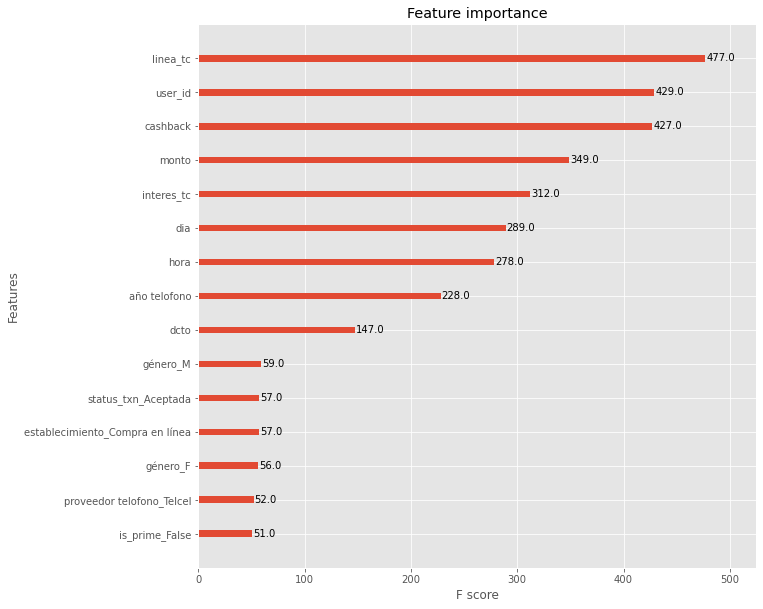

In [65]:
from xgboost import plot_importance
import matplotlib

matplotlib.rcParams['figure.figsize'] = (10.0,10)

plot_importance(model, max_num_features=15,importance_type='weight') # top 10 most important features

plt.show()

The most important variables to predict are 'linea_tc', 'user_id', 'cashback', 'monto' and 'interes_tc'

***

<a id="7. Final Conclusion"></a> <br>
# **7. Final Conclusion:** 
- The best algorithm to use was XGB Classifier, and the results were very good. 
- The following results were obtained from XGB Classifier. Precision Mean: 98.47  %, Recall Mean: 98.44 % and F1 Score Mean: 98.44 %.
- Over Sampling was key to obtain good results due to the problem of imbalanced.
- Logistic regression and Random Forest were the ones with worst performance.
- The most important variables according to XGB Classifier to predict are 'linea_tc', 'user_id', 'cashback', 'monto' and 'interes_tc'.
- The city and store with more fradulent transactions are Monterrey and 'Compras en Línea', respectively.
- The people with a Samsung telephone from Telcel of the years 2017, 2018 and 2019 are more related to fraudulent transactions.